# Elevator Movement Measurement Evaluation
### Imports and setup

In [68]:
include("./main.jl")
using .Main
series = 2
data = read_data_series(series)

DataSeries(Accelerometer(Jerk([0.142807866, 0.181227866, 0.219647866, 0.258067866, 0.296487866, 0.334907971, 0.373327971, 0.411747971, 0.450168075, 0.488588075  …  108.2986399, 108.3370614, 108.3754828, 108.4139043, 108.4523257, 108.4907471, 108.5291686, 108.56759, 108.6060115, 108.6444329], [0.005383491516, 0.003351211548, 0.003790855408, 0.006327629089, 0.0003032684326, 0.001331329346, 0.0001230239868, 0.001203536987, 0.00329875946, -0.0002689361572  …  -0.006175041199, -0.003529548645, -0.006646156311, -0.0117855072, -0.005414009094, -0.001704216003, -0.003826141357, 0.001987457275, -0.001502990723, -0.008091926575], "jerk_measurement"), Acceleration(nothing, nothing, ""), Velocity(nothing, nothing, ""), Position(nothing, nothing, "")), PressureSensor(Pressure([1.010264898, 2.01026495, 3.010266929, 4.010264898, 5.010265262, 6.010265158, 7.010264898, 8.010265731, 9.0102837, 10.0102775  …  98.43761196, 99.43761196, 100.437612, 101.437612, 102.437612, 103.437612, 104.437612, 105.437612

### Plot of Raw Data

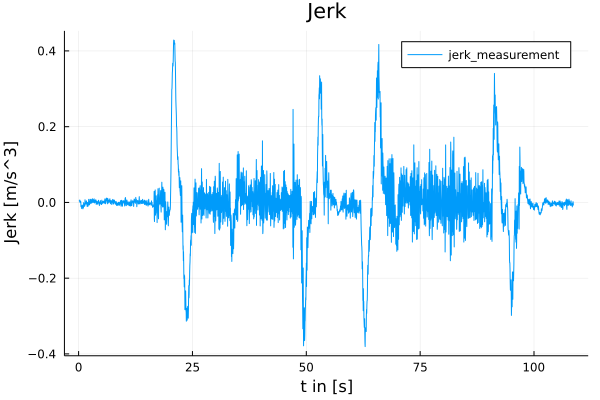

In [69]:
plot_stuff(data.accelerometer.jerk)

### Zoom in on the first 10 seconds

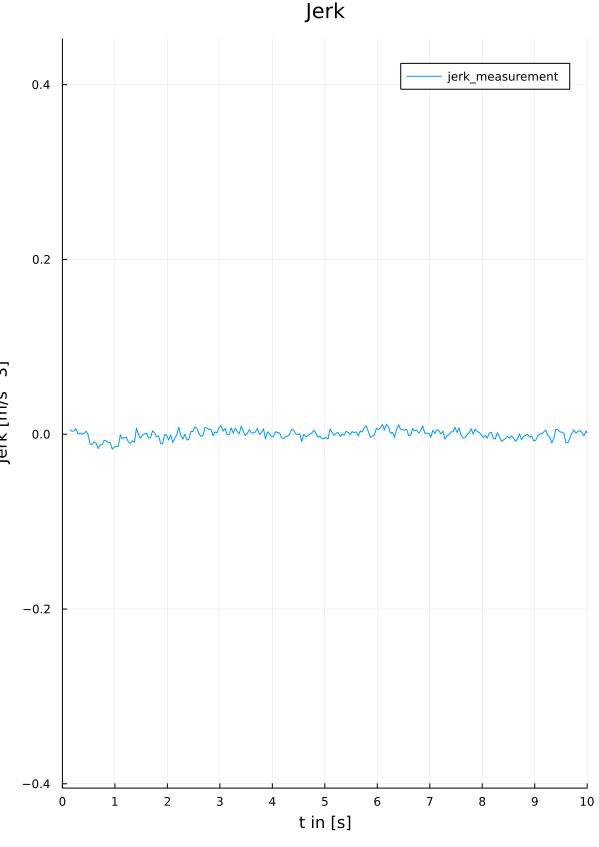

In [70]:
zoom_and_grid(0, 10)

### Cut of access data (initial shaking of the phone)

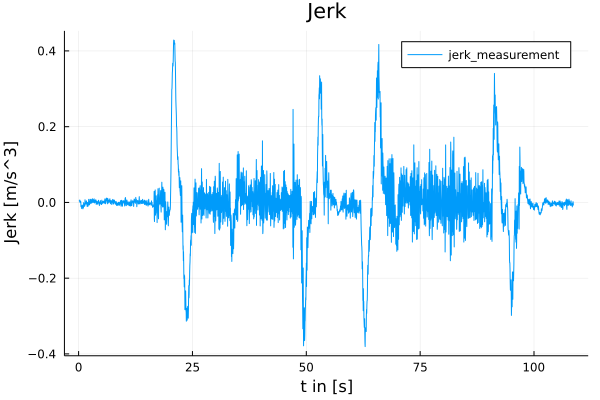

In [71]:
if series == 1
    cut(data, 0, 2)
end
plot_stuff(data.accelerometer.jerk)

### Evaluate sensor noise and apply correction

In [72]:
if series == 1
    offset = sensor_noise(data, 0, 15)
    apply_offset(data, offset)
elseif series == 2
    offset = sensor_noise(data, 0, 10)
    apply_offset(data, offset)
end
println("Offset: $offset")

Offset: -0.0002613141555844962


### Integrate Data to get Acceleration, Velocity and Position

In [73]:
integrate(data)

### Display Results
#### Acceleration by Accelerometer

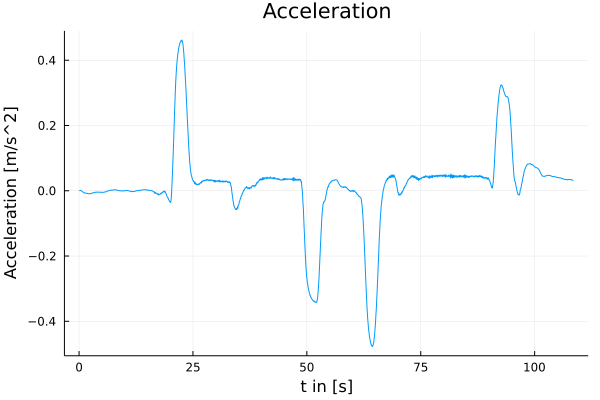

In [74]:
plot_stuff(data.accelerometer.acceleration)

#### Velocity by Accelerometer

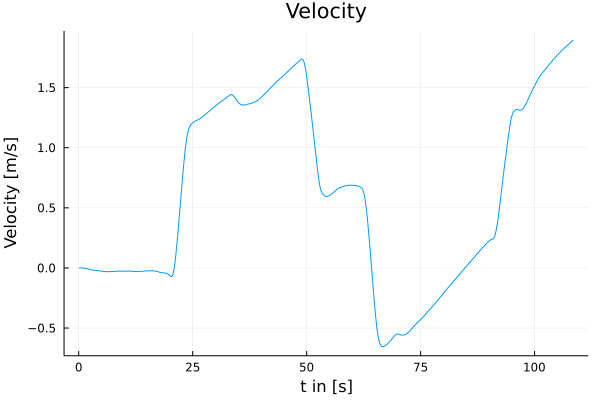

In [75]:
plot_stuff(data.accelerometer.velocity)

#### Position by Accelerometer

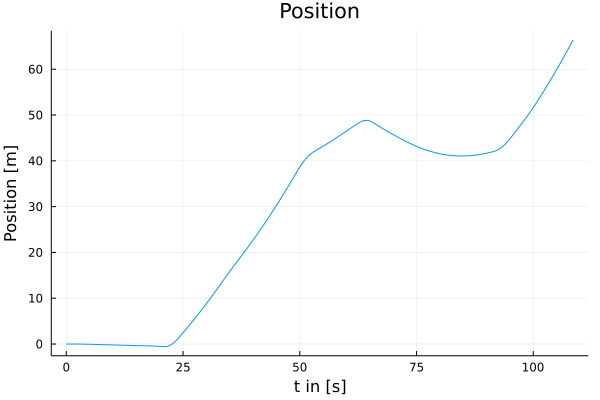

In [76]:
plot_stuff(data.accelerometer.position)

#### Pressure by Pressure Sensor

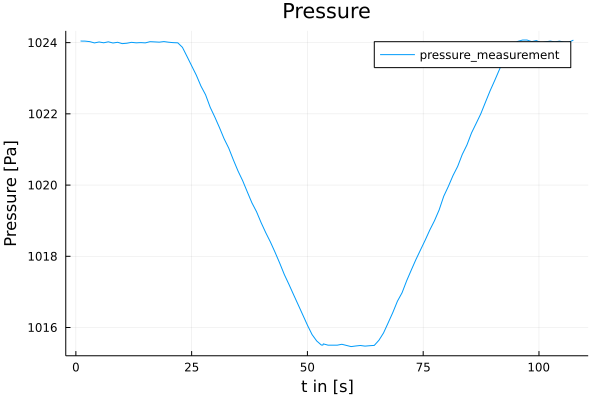

In [77]:
plot_stuff(data.pressure_sensor.pressure)

#### Velocity by Pressure Sensor

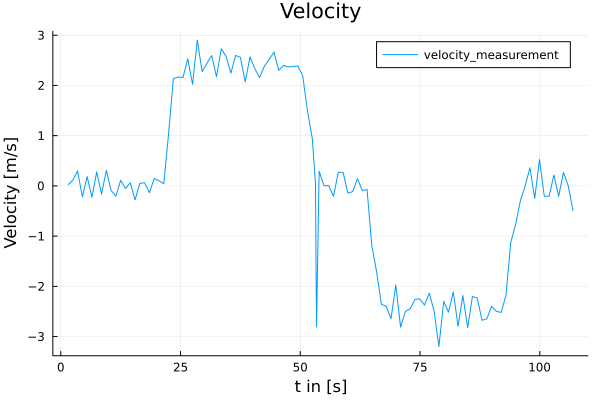

In [78]:
plot_stuff(data.pressure_sensor.velocity)

#### Position by Pressure Sensor

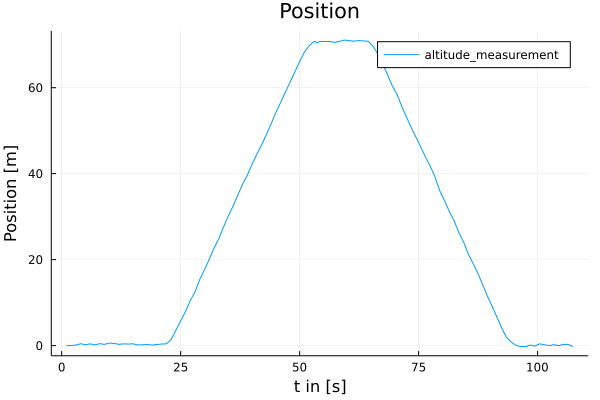

In [79]:
plot_stuff(data.pressure_sensor.position)

#### Velocity by Accelerometer and Pressure Sensor

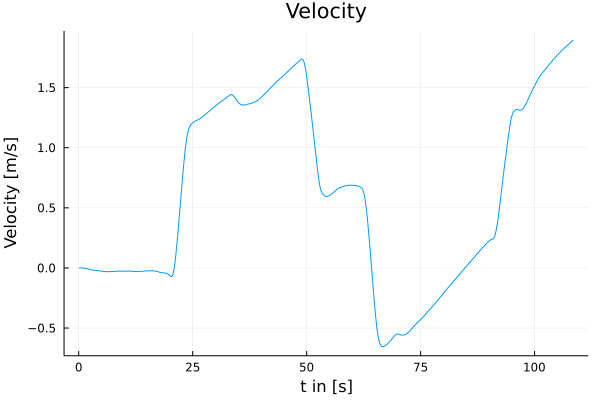

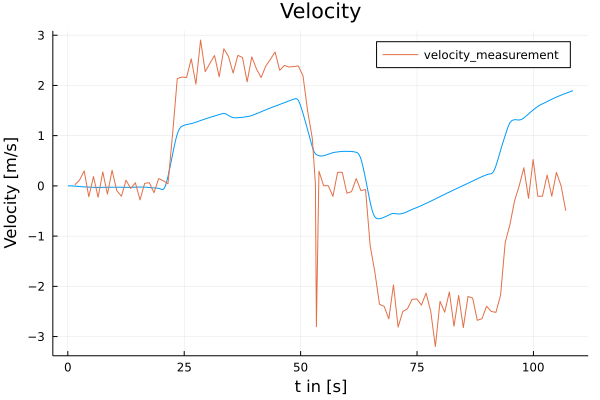

In [80]:
plot_stuff(data.accelerometer.velocity, data.pressure_sensor.velocity)

#### Position by Accelerometer and Pressure Sensor

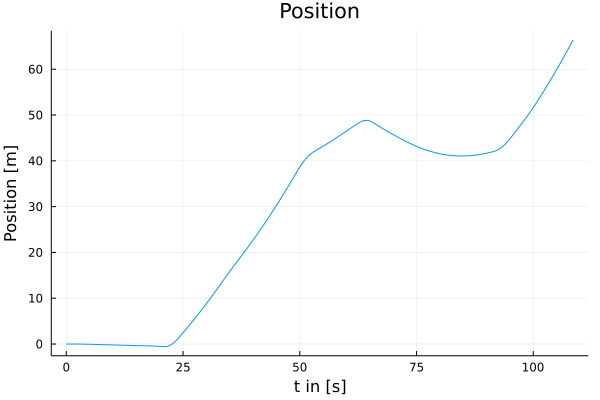

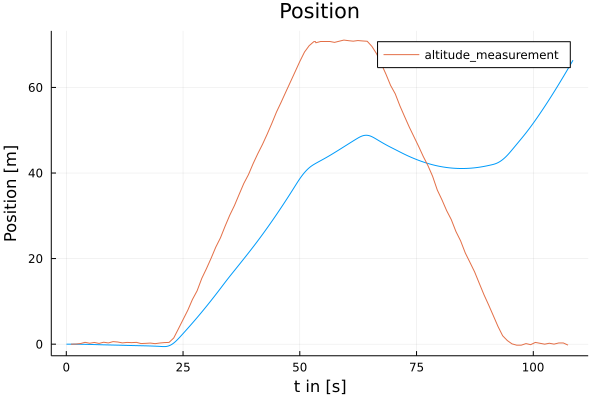

In [81]:
plot_stuff(data.accelerometer.position, data.pressure_sensor.position)